# 지리 정보 데이터 처리

지리정보데이터, 흔히 GIS(Geospatial Information System) 라고 말하는 것은 위치에 대한 정보를 광범위하게 포함하는 말이다. 예로는 좌표, 주소, 도시 나 우편번호 등이 있다. 이 절에서는 GeoPandas와 머신러닝에 지리정보를 활용하는 예를 설명하겠다. 

## Geopandas 

`Geopandas`는 파이썬에서 지리정보 데이터 처리의 기하하적 연산과 시각화 등을 돕는 패키지이다. 

#### 설치
 - `conda install -c conda-forge geopandas`
 
이름으로도 알 수 있듯이, Geopandas는 Pandas와 비슷하다. 두 가지의 자료형 `GeoSeries`와 `GeoDataFrame`이 있다. 다루는 방법에 큰 차이가 없다. 다만, 지리정보 데이터 분석에 유용한 속성과 메서드가 존재한다.

In [1]:
# 샘플 데이터 셋
import geopandas as gpd

countries = gpd.read_file(
    gpd.datasets.get_path('naturalearth_lowres'))
cities = gpd.read_file(
    gpd.datasets.get_path('naturalearth_cities'))

nybb = gpd.read_file(gpd.datasets.get_path('nybb'))

In [2]:
countries.tail(3)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
174,49052489.0,Africa,South Africa,ZAF,491000.0,POLYGON ((31.52100141777888 -29.25738697684626...
175,11862740.0,Africa,Zambia,ZMB,17500.0,"POLYGON ((32.75937544122132 -9.23059905358906,..."
176,12619600.0,Africa,Zimbabwe,ZWE,9323.0,"POLYGON ((31.19140913262129 -22.2515096981724,..."


In [3]:
cities.tail()

,name,geometry
197,Cairo,POINT (31.24802236112612 30.05190620510371)
198,Tokyo,POINT (139.7494615705447 35.68696276437117)
199,Paris,POINT (2.33138946713035 48.86863878981461)
200,Santiago,POINT (-70.66898671317483 -33.4480679569341)
201,Singapore,POINT (103.853874819099 1.294979325105942)


#### Geopandas의 시각화

방금 불러온 샘플 데이터를 활용해 Geopandas를 사용하는 간단한 방법을 학습하겠다. 

Geopandas의 객체로 만들고, plot()명령을 사용하면, `Geometry` 데이터를 시각화 할 수 있다. 
`Geometry` 데이터는 지리정보를 표현하는 다각형, 선, 점을 이용해서 만들 수 있다. Geopandas는 내부적으로 다각형, 선, 점을 `Shapely` 패키지를 사용하여 처리한다. 각 Polygon, LineString, Point 로 정의되어 있다. 이 데이터를 사용하는 방법은 뒤에서 설명할 것이다. 

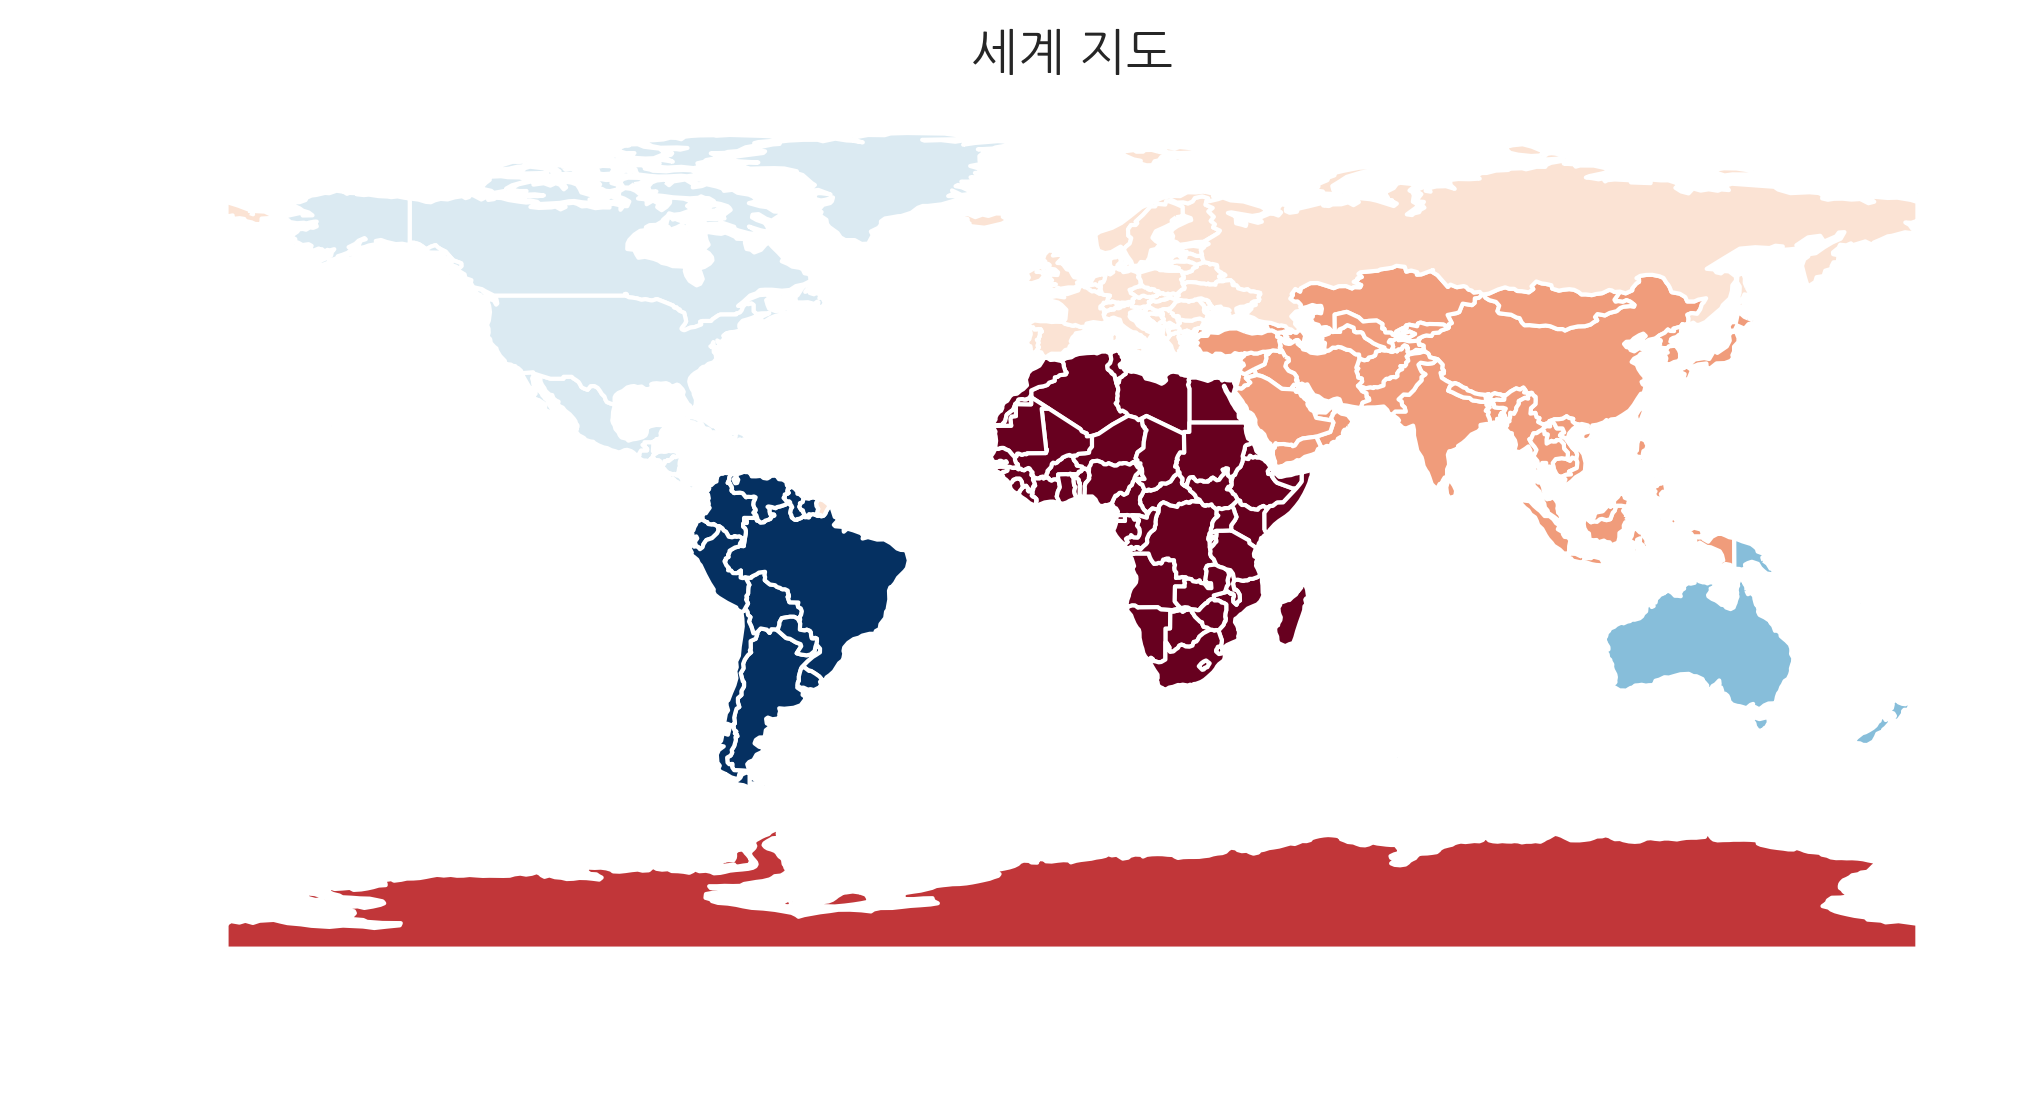

In [4]:
ax = countries.plot(column='continent', cmap='RdBu')
ax.set_title("세계 지도")
ax.set_axis_off()
plt.show()

그리고, 많은 경우 지도위에서 의미 있는 정보를 함께 표현 하고 싶을 것이다. 
이 때는, plot 명령의 column 인자에 반영하고 싶은 데이터의 컬럼을 입력하면 된다. 만약 표현하고 싶은 컬럼이 실수 변수라면, 색을 변화시키는 기준 즉 데이터를 구분하는 방법과 갯수를 정의할 수 있다. 먼저 구분하는 방법은 plot명령의 scheme 인자로 설정하는데, 지원하는 것으로는 'Equal_interval'(동일한 간격으로 구분), 'Quantiles'(4분위수를 구하여 구분), 'Fisher_Jenks'(클래스 내 분산을 줄이고, 클래스 끼리의 분산을 최대화하는 방식으로 구분) 이다. 구분하는 갯수는 k 인자에 원하는 숫자를 입력하면된다. default는 5이다.  

아래 코드는 국가별 GDP 추정치를 해당 국가의 추정인구로 나누어, 추정 1인당 GDP를 만들고, 이를 지도에서 색으로 표현한 예이다. 

/home/dockeruser/anaconda3/lib/python3.6/site-packages/pysal/__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysal` 2.0 prelease candidate. The API changes and a guide on how to change imports is provided at https://migrating.pysal.org
  ), VisibleDeprecationWarning)


Text(0.5,1,'세계 국가의 1인당 GDP')

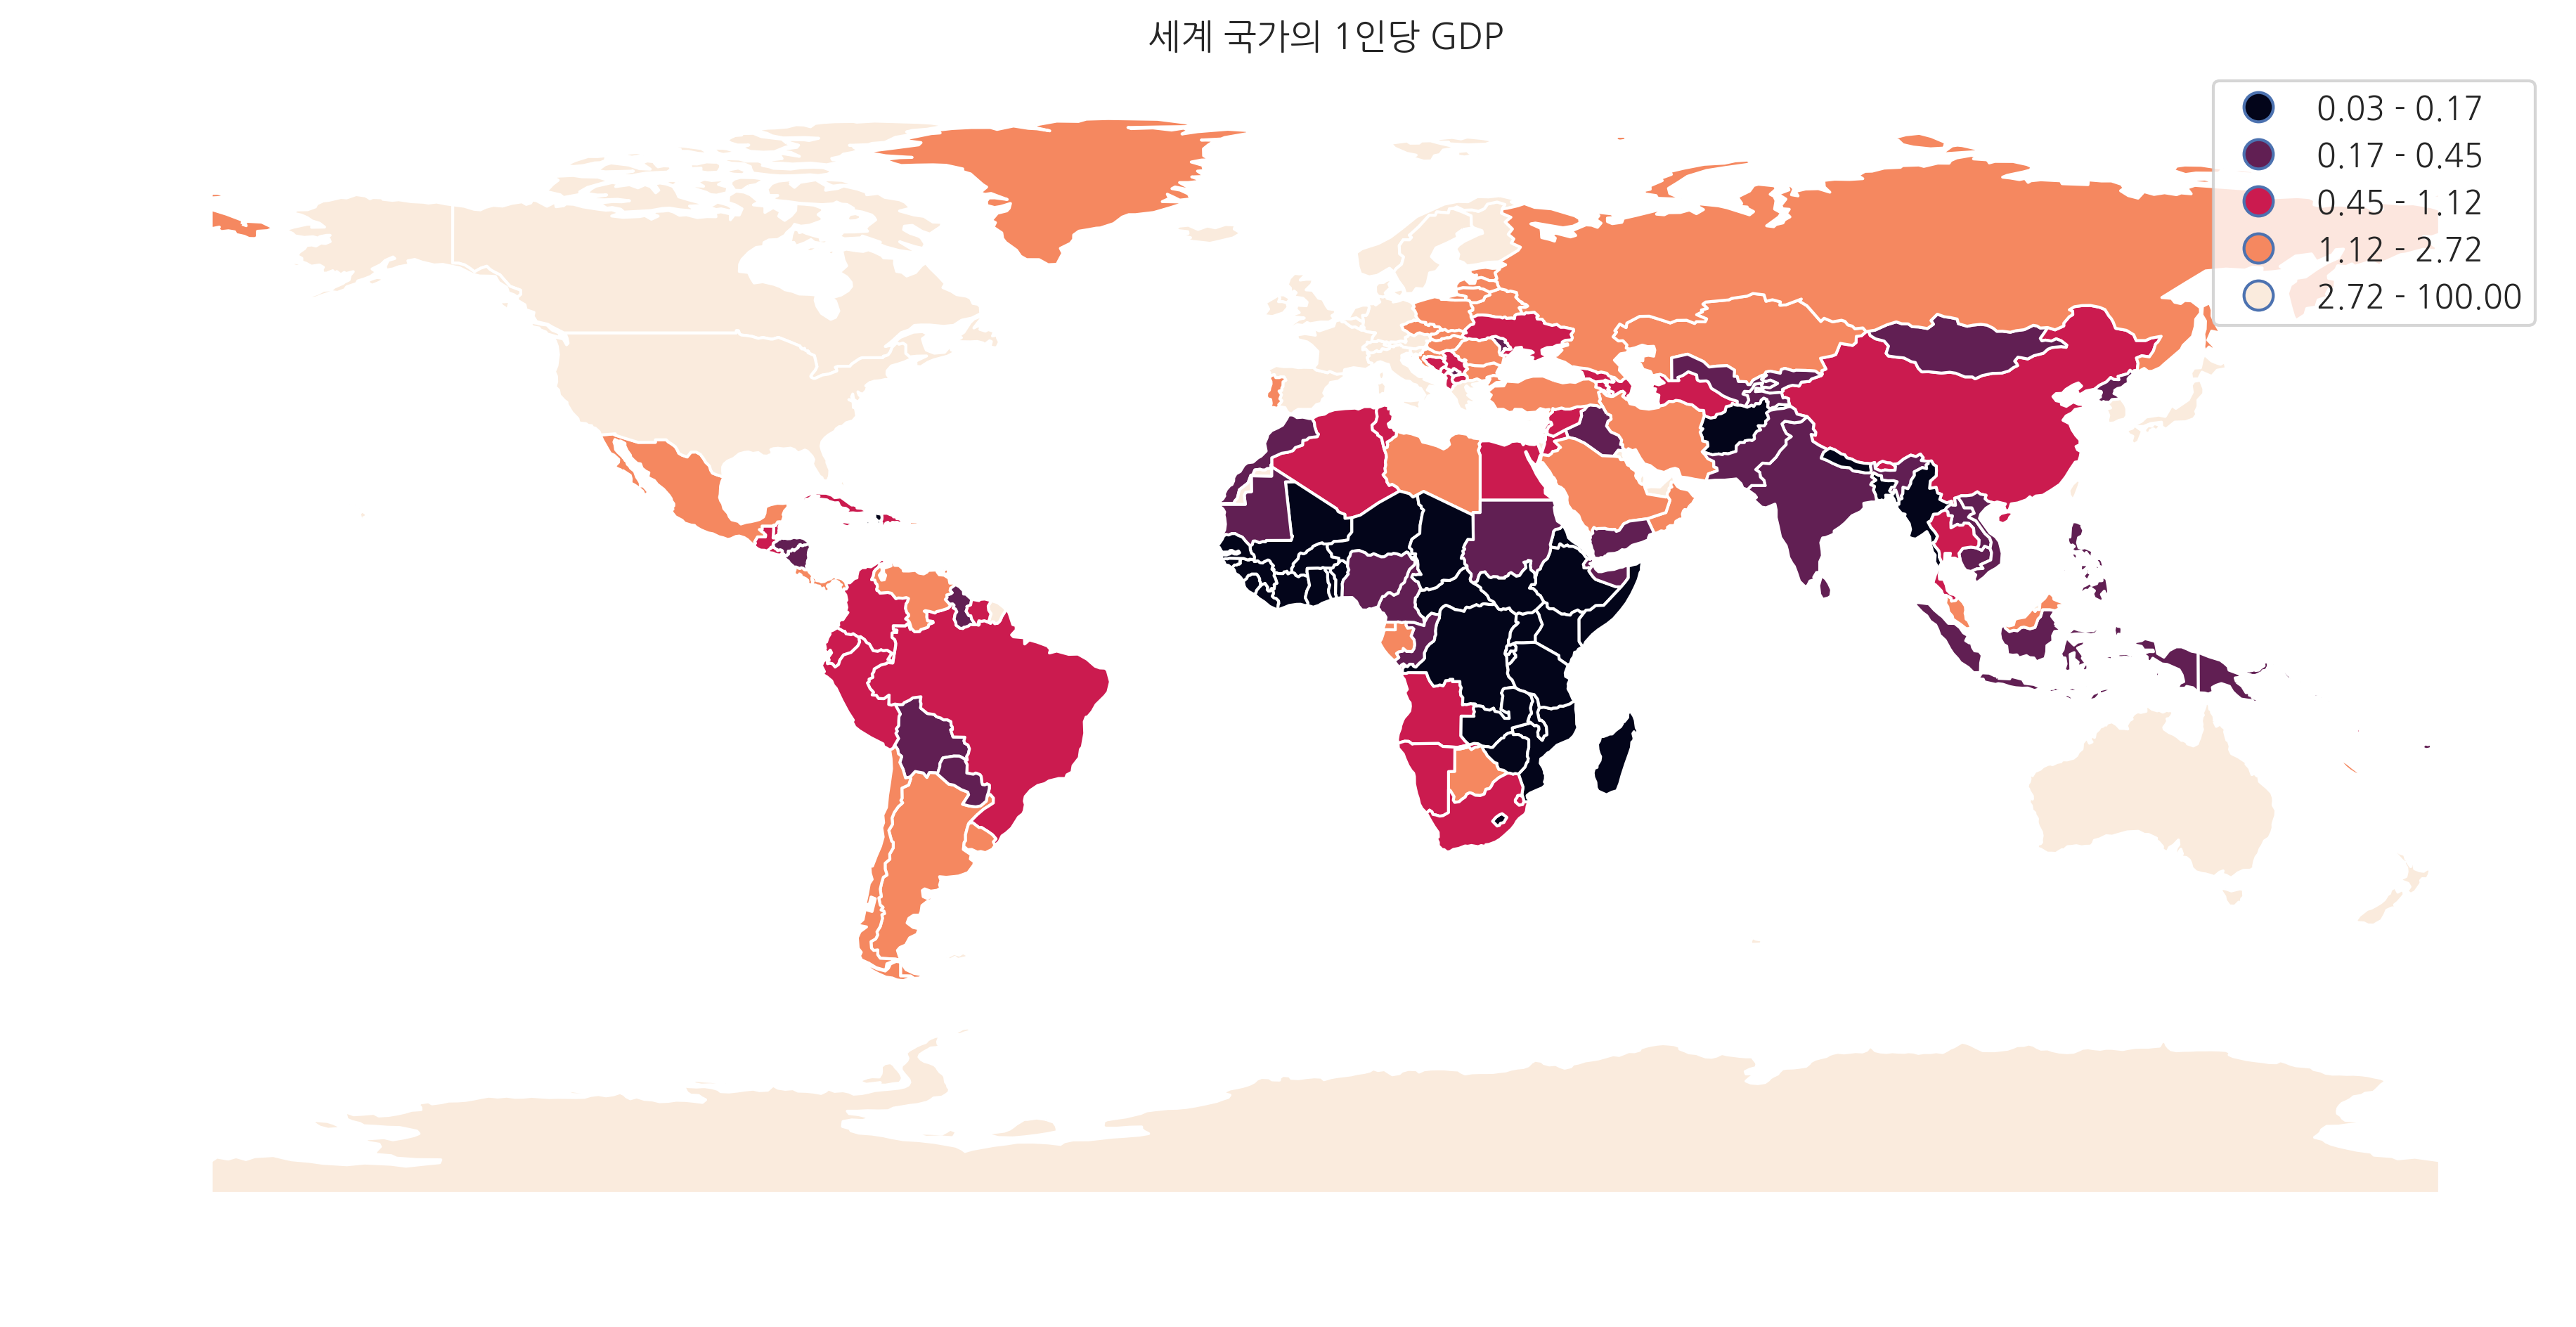

In [5]:
# 1인당 GDP 연산 
countries['gdp_per_cap'] = countries['gdp_md_est'] / countries['pop_est'] * 100

ax = countries.plot(figsize=(15, 15), column='gdp_per_cap', scheme='quantiles', k=5, legend=True)
ax.set_axis_off()
ax.set_title("세계 국가의 1인당 GDP")

## Geopandas의 Geometry 데이터

#### Polygons 

한 국가의 영토 따위 등은 다각형으로 나타낼 수 있다. `Countries` 데이터 셋에서는 다음과 같이 Polygon 데이터를 제공한다. 

In [6]:
countries.geom_type[:3]

0         Polygon
1    MultiPolygon
2         Polygon
dtype: object

In [7]:
# 아래와 같이, 여러 개의 점(Point)들로 이루어져있다. 
print(countries.geometry[113])

POLYGON ((165.7799898623264 -21.08000497811563, 166.5999914899338 -21.70001881275353, 167.1200114280869 -22.15999073658349, 166.7400346214448 -22.39997608814695, 166.1897322939687 -22.12970834726045, 165.4743754417522 -21.67960662199823, 164.8298153017757 -21.14981983814195, 164.1679952334136 -20.44474659595163, 164.029605747736 -20.10564584725235, 164.4599670758627 -20.1200118954295, 165.0200362490421 -20.45999114347773, 165.4600093935751 -20.80002206795826, 165.7799898623264 -21.08000497811563))


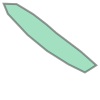

In [8]:
countries.geometry[113]

#### Points 
Cities 데이터에서는 도시를 하나의 점으로 나타내었다. 이 포인트들을 아래와 같이 지도위에 표현 할 수 있다. 

In [9]:
cities.geom_type[:3]

0    Point
1    Point
2    Point
dtype: object

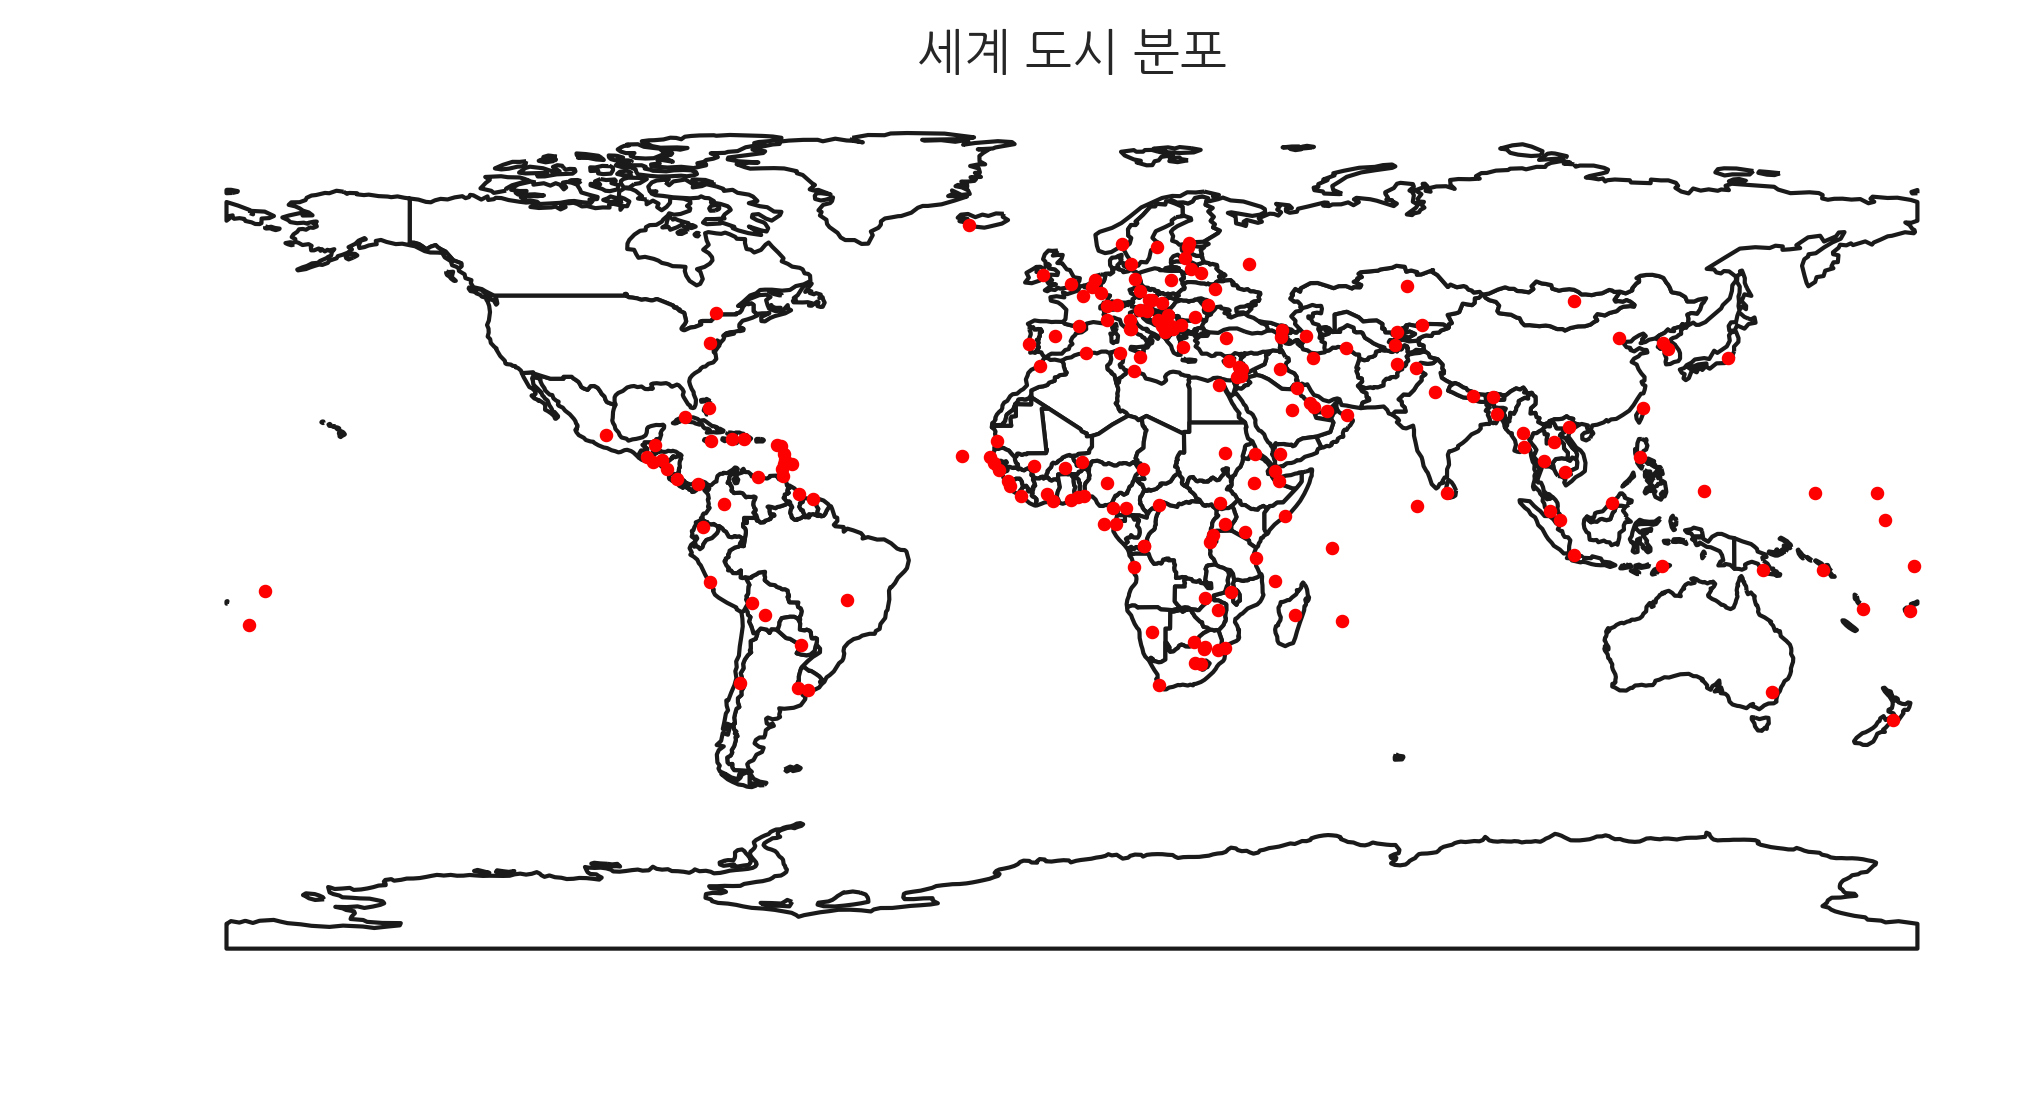

In [10]:
base = countries.plot(color='white', edgecolor="k")
ax = cities.plot(ax=base, marker='o', color='red', markersize=5);
ax.set_axis_off()
ax.set_title("세계 도시 분포")
plt.show()

## Coordinate reference systems

`CRS` 는 지구라는 곡면을 2차원 데이터(평면)로 표현하는 방법론을 의미한다. Geopandas 데이터라면, `crs` 라는 속성값으로 이를 확인 할 수 있다. CRS가 다른 데이터의 경우, 좌표간의 거리나 위치 등이 다르게 표현 될 수 있기 때문에, 통일 시켜주는 것이 좋다. 잘 사용되는 CRS는 아래와 같다.
* WGS84(EPSG:4326) 경위도: GPS가 사용하는 좌표계(경도와 위도)
* Bessel 1841(EPSG:4004) 경위도: 한국과 일본에 잘 맞는 지역타원체를 사용한 좌표계
* Google Mercator(EPSG:3857): 구글지도/빙지도/야후지도/OSM 등 에서 사용중인 좌표계

아래 코드는 `epsg:4326` 에서 `epsg:3857`로 변환한다.

In [11]:
countries.crs

{'init': 'epsg:4326'}

In [12]:
# 위의 좌표계와 비교해보자.
countries_mercator = countries.to_crs(epsg=3857)

print(countries_mercator.geometry[113])

POLYGON ((18454544.05518823 -2401420.887459434, 18545826.21882315 -2475546.787735221, 18603714.5735407 -2530744.901528734, 18561415.74891204 -2559615.380407254, 18500156.37403505 -2527105.410038833, 18420523.21351083 -2473101.37355341, 18348771.106943 -2409751.994917226, 18275097.63393617 -2325792.363960424, 18259692.18685939 -2285550.336408644, 18307599.79076358 -2287253.416006154, 18369946.40593091 -2327603.551034443, 18418923.99234304 -2368049.267481055, 18454544.05518823 -2401420.887459434))


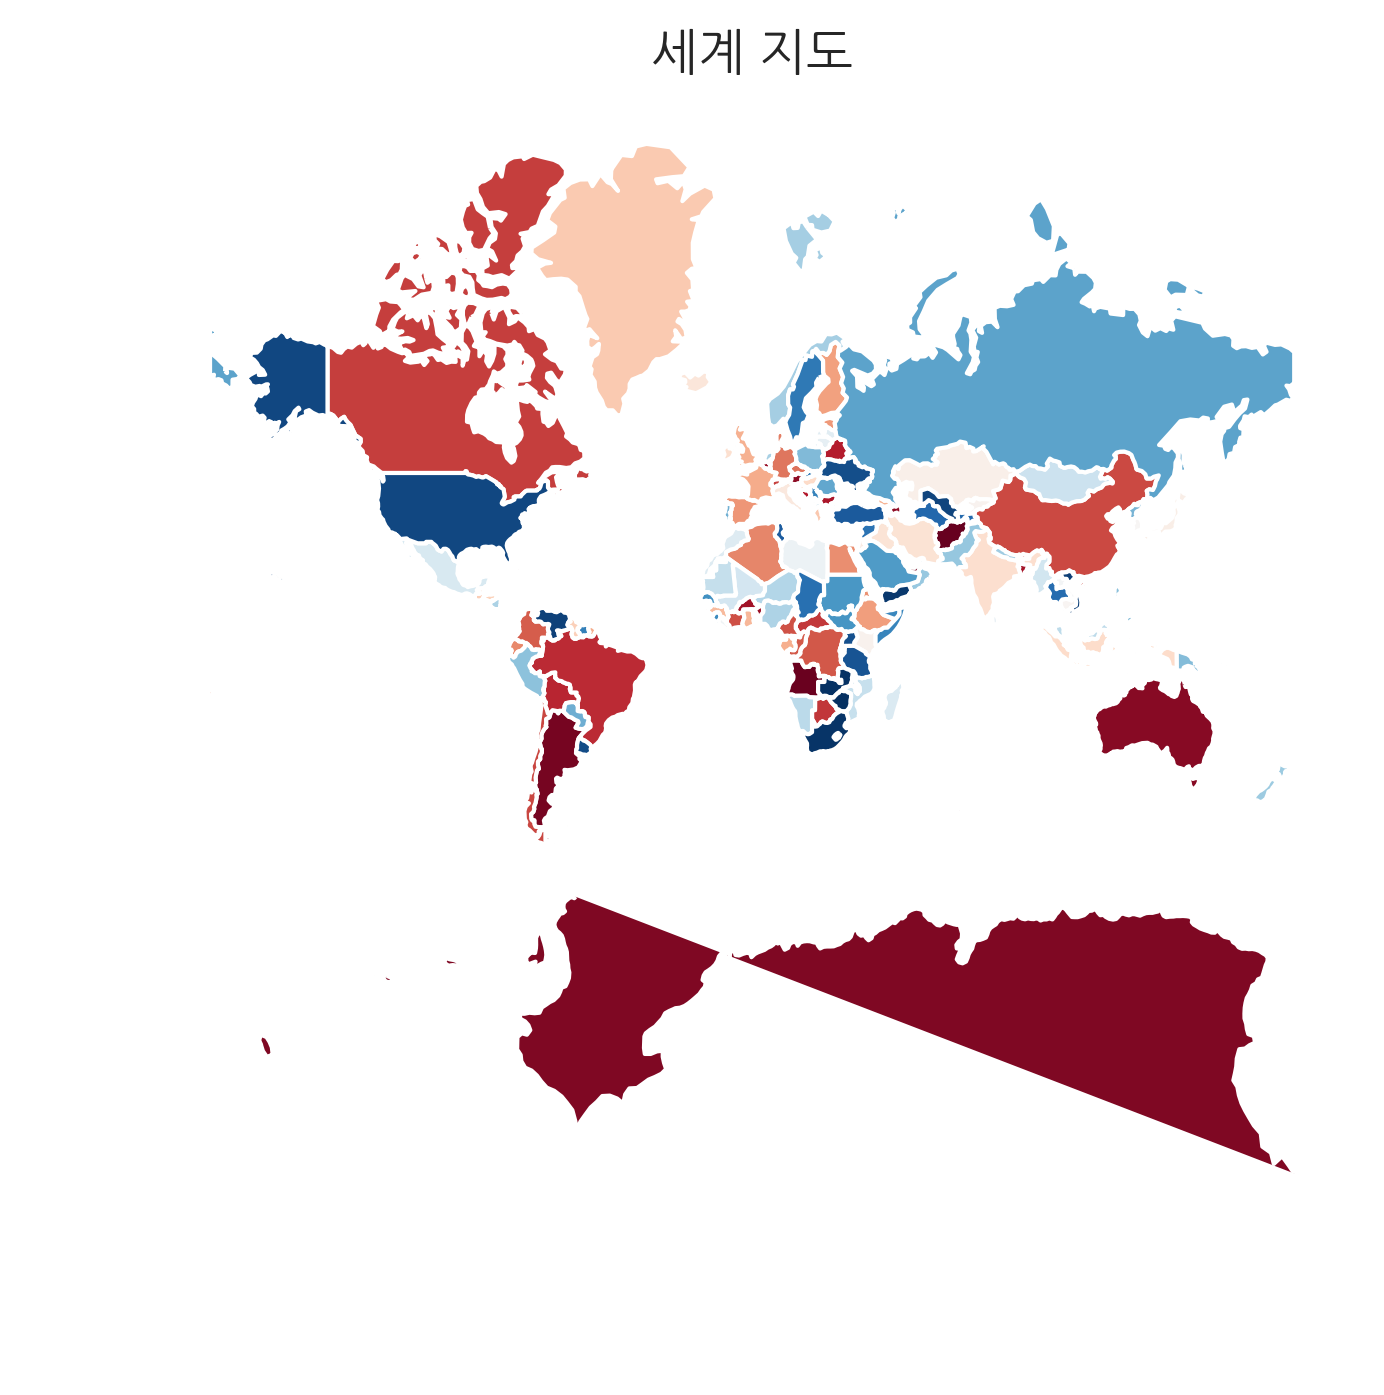

In [13]:
ax = countries_mercator.plot(cmap='RdBu')
ax.set_title("세계 지도")
ax.set_axis_off()
plt.show()

## 지리 데이터 간의 관계 연산

Geopandas는 지리데이터 간의 관계를 연산해주는 기능을 가지고 있다. 관계를 연산한다는 말은, 두 데이터가 교차하는지, 하나가 다른 하나의 내부에 있는지 등을 말한다. 

좌표 데이터를 Shapely의 Geometry 자료형으로 만들면, 불러온 데이터셋을 이용해, 어떤 도시가 어느 나라 안에 있는지, 도시끼리의 거리는 얼마나 되는지, 어떤 도시가 두 도시 사이에 존재하는지 등의 관계를 알 수 있다. 

In [14]:
print(type(countries.geometry[0]))
print(type(cities.geometry[0]))

<class 'shapely.geometry.polygon.Polygon'>
<class 'shapely.geometry.point.Point'>


In [15]:
from shapely.geometry import Point, Polygon, LineString

#### 간단한 예제 

* 동북아시아의 주요 도시

In [16]:
northern_asia = countries.loc[[30, 82, 87]]

korea = countries.loc[countries['name'] == 'Korea', 'geometry'].squeeze()
               
seoul = Point(126.99778, 37.56829) # 경도, 위도 
beijing = Point(116.363625, 39.913818)
tokyo = Point(139.839478, 35.652832)
hongkong = Point(114.149139, 22.286394)

line = LineString([hongkong, beijing, seoul, tokyo])

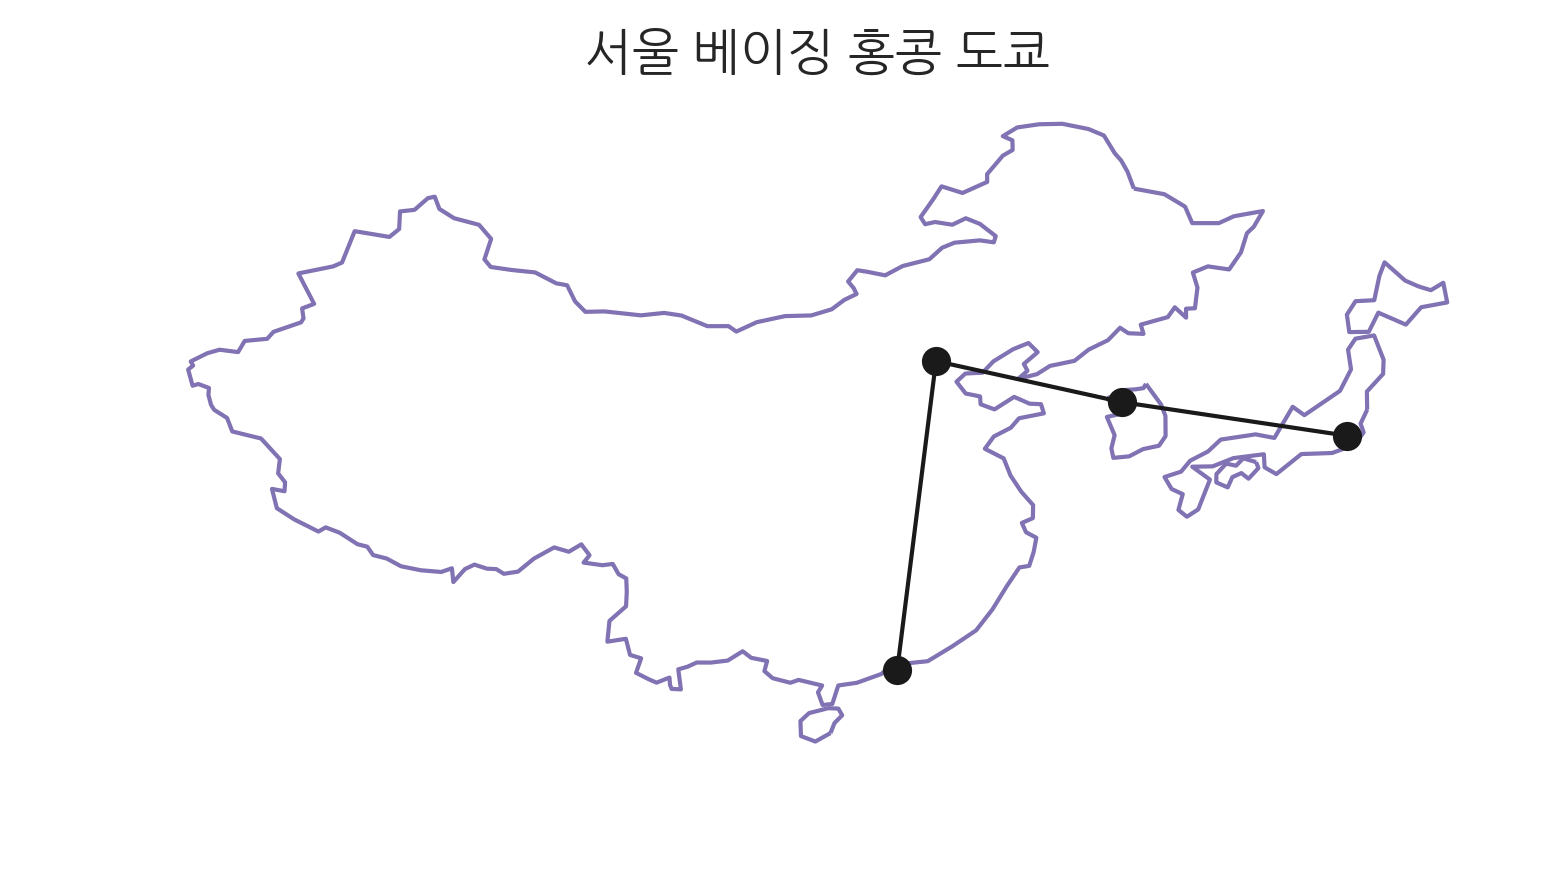

In [17]:
base = northern_asia.plot(figsize=(10, 3), color="w", edgecolor="m")
ax = gpd.GeoSeries([seoul, hongkong, beijing, tokyo, line]).plot(ax=base, color="k", edgecolor='k', lw=1)
ax.set_title("서울 베이징 홍콩 도쿄")
ax.set_axis_off()

* 기본 관계 연산
  - `within` : 지리적으로 포함되는지 여부
  - `contains` : 지리적으로 포함하고 있는지 여부
  - `intersects` : 지리적으로 교차하는지 여부, 두 지리가 경계선만 닿아있어도, True를 반환
  - `crosses` : 지리적으로 교차하는지 여부, intersects와 차이점은 crosses는 내부를 지나가야만 True를 반환한다는 점이다. 
  - `distance` : 두 점사이의 거리 (절대 거리)

In [18]:
seoul.within(korea)

True

In [19]:
korea.contains(seoul)

True

In [20]:
line.intersects(korea)

True

In [21]:
line.crosses(korea)

True

In [22]:
# 서울에서 베이징까지의 거리 
seoul.distance(beijing)

10.889754550163614

In [23]:
# 검색 용도로 활용할 수 있다. 
countries[countries.crosses(line)]

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,gdp_per_cap
30,1.338613e+09,Asia,China,CHN,7973000.0,(POLYGON ((110.3391878601516 18.67839508714761...,0.595617
82,1.270787e+08,Asia,Japan,JPN,4329000.0,(POLYGON ((134.6384281760039 34.14923371025642...,3.406551
87,4.850897e+07,Asia,Korea,KOR,1335000.0,"POLYGON ((128.3497164246766 38.61224294692785,...",2.752068
129,2.266534e+07,Asia,Dem. Rep. Korea,PRK,40000.0,"POLYGON ((130.6400159038524 42.39500946712528,...",0.176481


In [24]:
# 한국으로 부터, 서울과 베이징 간의 거리 보다 가까운 데이터를 찾는다. 
countries[countries.geometry.distance(seoul) <= seoul.distance(beijing)]

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,gdp_per_cap
30,1.338613e+09,Asia,China,CHN,7973000.0,(POLYGON ((110.3391878601516 18.67839508714761...,0.595617
82,1.270787e+08,Asia,Japan,JPN,4329000.0,(POLYGON ((134.6384281760039 34.14923371025642...,3.406551
87,4.850897e+07,Asia,Korea,KOR,1335000.0,"POLYGON ((128.3497164246766 38.61224294692785,...",2.752068
129,2.266534e+07,Asia,Dem. Rep. Korea,PRK,40000.0,"POLYGON ((130.6400159038524 42.39500946712528,...",0.176481
135,1.400412e+08,Europe,Russia,RUS,2266000.0,(POLYGON ((143.6480074403629 50.74760040954152...,1.618095


- 지리정보의 속성 (아래의 속성값은 Point 데이터에서는 모두 0이다. ) 
  - `area` : 넓이 
  - `boundary` : 테두리 
  - `centroid` : 중앙지점 

In [25]:
korea.area

9.954819746830225

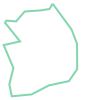

In [26]:
korea.boundary

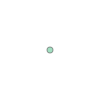

In [27]:
korea.centroid

In [28]:
seoul.area

0.0

### Geopandas를 사용한 지리정보 데이터 처리 예제 

여기에서는 scikit learn 패키지에 있는 `Callifornia House Value`데이터 셋을 사용하겠다. 

callifornia house value 데이셋은 1990년 인구 조사로 부터 추출된 데이터로 한 행은 인구 조사 단위 그룹의 데이터이다. 한 단위 그룹에는 보통 600 ~ 3000명 정도의 인구가 속해있다고 한다. 다음은 이 데이터셋의 각 컬럼의 의미들이다. 

##### California House Value dataset 
  - Target : 집 가치의 평균  
  
  - MedInc : 단위 그룹 내 수입의 중앙값 
  - HouseAge : 단위 그룹 내 집 연식의 중앙값 
  - AveRooms : 평균 방 갯수
  - AveBedrms : 평균 침실 갯수 
  - Population : 단위 그룹 내의 인구 
  - AveOccup : 평균 세대 수 
  - Latitude : 단위 그룹의 위도 
  - Longitude : 단위 그룹의 경도

In [29]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()

In [30]:
housing = gpd.GeoDataFrame(np.concatenate([california.data, california.target.reshape(-1, 1)],
                                     axis=1), columns=california.feature_names+["target"])
housing.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894


이 데이터에서 Latitude와 Longitude를 Shapely.Point 객체로 만들어 새로운 컬럼은 만든다. 

In [31]:
housing["geometry"] = [Point(x, y) for x, y in zip(housing.Longitude, housing.Latitude)]
housing.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target,geometry
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781,POINT (-121.09 39.48)
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771,POINT (-121.21 39.49)
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923,POINT (-121.22 39.43)
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847,POINT (-121.32 39.43)
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894,POINT (-121.24 39.37)


먼저 해볼 수 있는 것은 단위 그룹의 위치별 집 가격의 분포를 시각화 해보는 것이다. 

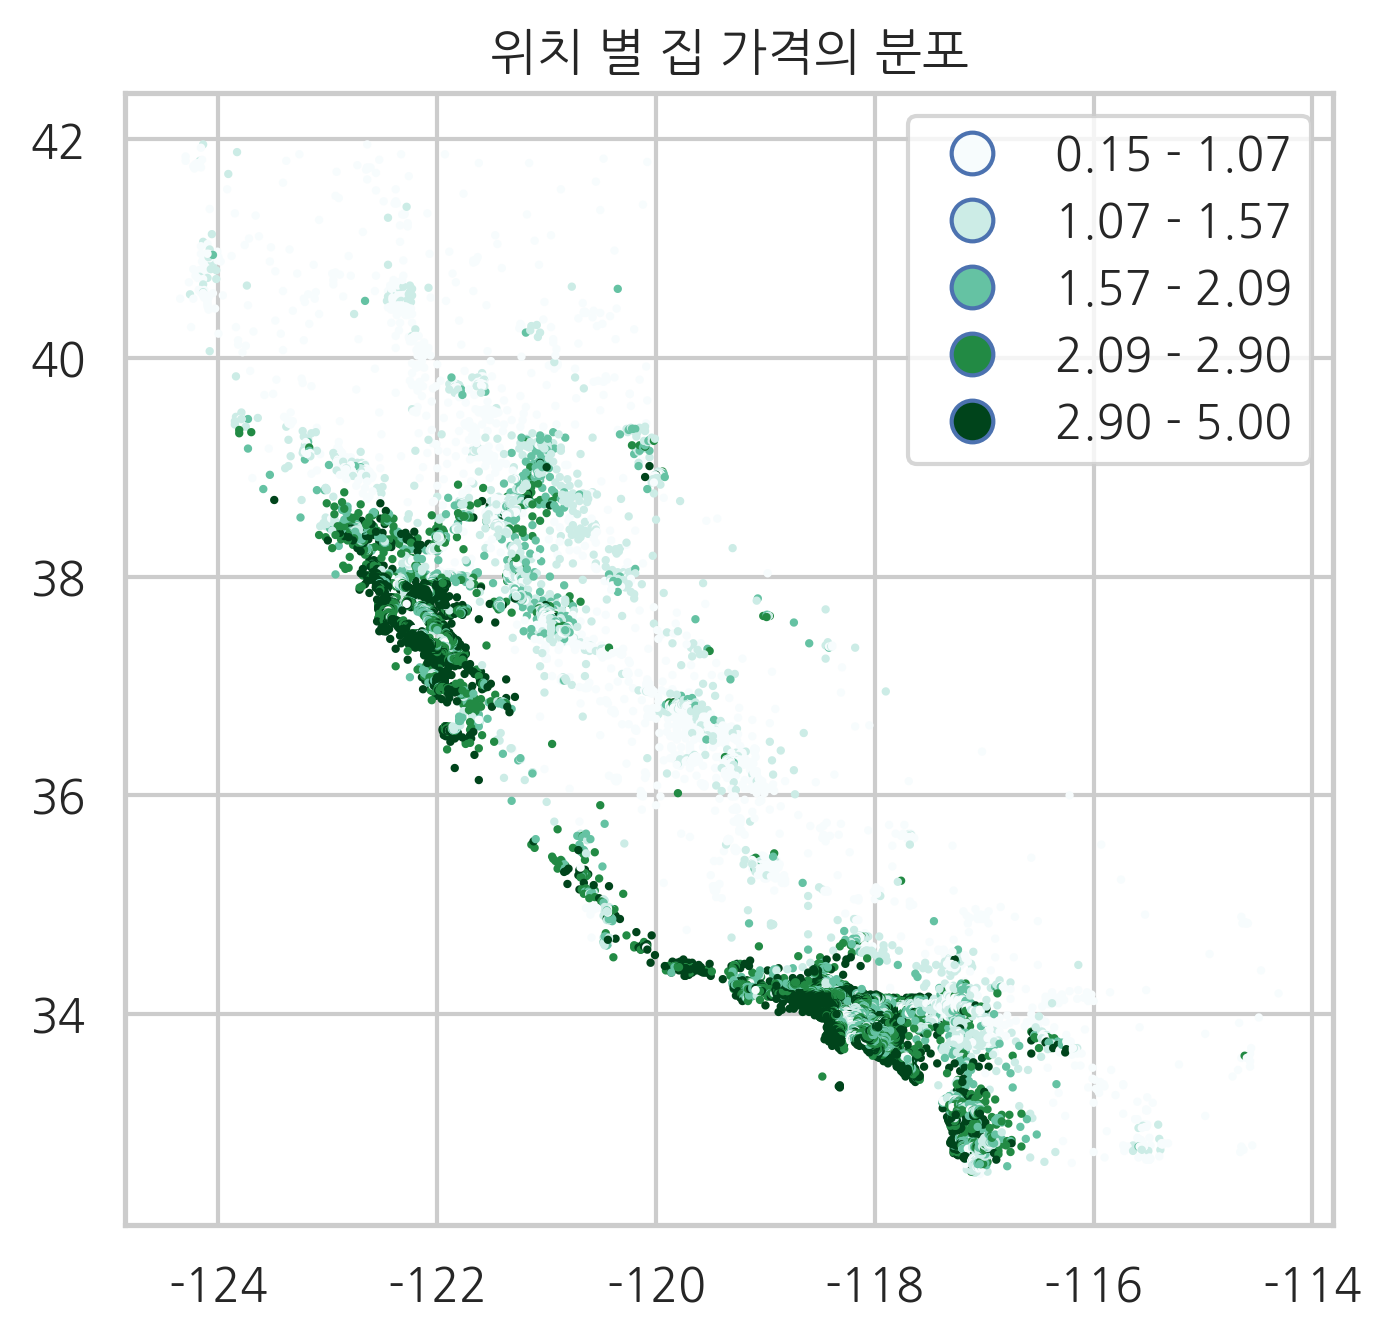

In [32]:
ax = housing.plot(column='target', scheme='quantiles', k=5, legend=True, markersize=1, cmap="BuGn")
ax.set_title("위치 별 집 가격의 분포")
plt.show()